In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('data/immoweb-dataset.csv')
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80368 entries, 0 to 80367
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80368 non-null  int64  
 1   id                        80368 non-null  float64
 2   url                       80368 non-null  object 
 3   type                      80368 non-null  object 
 4   subtype                   80368 non-null  object 
 5   bedroomCount              73558 non-null  float64
 6   bathroomCount             66672 non-null  float64
 7   province                  80368 non-null  object 
 8   locality                  80368 non-null  object 
 9   postCode                  80368 non-null  int64  
 10  habitableSurface          67783 non-null  float64
 11  roomCount                 21948 non-null  float64
 12  monthlyCost               0 non-null      float64
 13  hasAttic                  12516 non-null  object 
 14  hasBas

np.int64(0)

In [3]:
# Drop rows price with missing critical values
df.dropna(subset=["price"], inplace=True)

#bedroomcount put 1 on NA

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76370 entries, 0 to 80367
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                76370 non-null  int64  
 1   id                        76370 non-null  float64
 2   url                       76370 non-null  object 
 3   type                      76370 non-null  object 
 4   subtype                   76370 non-null  object 
 5   bedroomCount              73550 non-null  float64
 6   bathroomCount             66665 non-null  float64
 7   province                  76370 non-null  object 
 8   locality                  76370 non-null  object 
 9   postCode                  76370 non-null  int64  
 10  habitableSurface          67780 non-null  float64
 11  roomCount                 21947 non-null  float64
 12  monthlyCost               0 non-null      float64
 13  hasAttic                  12514 non-null  object 
 14  hasBasement

In [4]:
# Clean column names: remove whitespace, lower case, replace space by underscore
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop unused columns
df.drop(columns=['unnamed:_0', 'url', 'id', 'monthlycost', 'hasbalcony', 'accessibledisabledpeople',
                 'bathroomcount','roomcount','hasattic','hasbasement','hasdressingroom',
                 'diningroomsurface','hasdiningroom','floorcount','streetfacadewidgth',
                 'floodzonetype','heatingtype','hasheatpump','hasvoltaicpanels',
                 'hasthermicpanels','kitchensurface','kitchentype','haslivingroom',
                 'livingroomsurface','gardenorientation','hasairconditioning',
                 'hasarmoreddoor','hasvisiophone','hasoffice',
                 'hasfireplace','terracesurface','terraceorientation',
                 'gardensurface', 'toiletcount',
                 'hasphotovoltaicpanels', 'streetfacadewidth','buildingconstructionyear',
                 'facedecount', 'landsurface'], inplace=True, errors='ignore') 

df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 76370 entries, 0 to 80367
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 76370 non-null  object 
 1   subtype              76370 non-null  object 
 2   bedroomcount         73550 non-null  float64
 3   province             76370 non-null  object 
 4   locality             76370 non-null  object 
 5   postcode             76370 non-null  int64  
 6   habitablesurface     67780 non-null  float64
 7   buildingcondition    57989 non-null  object 
 8   haslift              19043 non-null  object 
 9   hasgarden            15957 non-null  object 
 10  parkingcountindoor   27803 non-null  float64
 11  parkingcountoutdoor  18095 non-null  float64
 12  hasswimmingpool      1816 non-null   object 
 13  hasterrace           47427 non-null  object 
 14  epcscore             64404 non-null  object 
 15  price                76370 non-null  floa

In [5]:
def add_parking_col(df):
        df = __clean_parking_data(df)
        df["hasparking"] = df.apply(
            lambda row: 1 if (
                (not pd.isna(row.parkingcountindoor) and row.parkingcountindoor > 0)
                or (not pd.isna(row.parkingcountoutdoor) and row.parkingcountoutdoor > 0)
            ) else 0,
            axis=1
        )
        count_0 = df['hasparking'].value_counts().get(0)
        count_1 = df['hasparking'].value_counts().get(1)
        print('count_0', count_0, 'count_1', count_1 )
        print(df.info())
        return df

def __check_if_too_large(df, col_name):
    return df[col_name] > 1000

def __check_if_large_and_apt(df, col_name):
    return (df[col_name] > 100) & (df['type'] == 'APARTMENT')

def __clean_parking_data(df):
    orig = df.shape[0]
    # > 1000 drop, >100 keep if type is not apartment
    rows_to_drop = (__check_if_too_large(df, 'parkingcountindoor')) | (__check_if_too_large(df, 'parkingcountoutdoor'))
    df = df[~rows_to_drop]
    count = orig - df.shape[0]
    print(f'Dropped {count} too large')
    
    orig = df.shape[0]
    rows_to_drop = (__check_if_large_and_apt(df, 'parkingcountindoor')) | (__check_if_large_and_apt(df, 'parkingcountoutdoor'))
    df = df[~rows_to_drop]
    count = orig - df.shape[0]
    print(f'Dropped {count} large and apartment type ')
    return df

add_parking_col(df)

Dropped 7 too large
Dropped 16 large and apartment type 
count_0 41425 count_1 34922
<class 'pandas.core.frame.DataFrame'>
Index: 76347 entries, 0 to 80367
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 76347 non-null  object 
 1   subtype              76347 non-null  object 
 2   bedroomcount         73527 non-null  float64
 3   province             76347 non-null  object 
 4   locality             76347 non-null  object 
 5   postcode             76347 non-null  int64  
 6   habitablesurface     67758 non-null  float64
 7   buildingcondition    57972 non-null  object 
 8   haslift              19025 non-null  object 
 9   hasgarden            15954 non-null  object 
 10  parkingcountindoor   27783 non-null  float64
 11  parkingcountoutdoor  18091 non-null  float64
 12  hasswimmingpool      1816 non-null   object 
 13  hasterrace           47407 non-null  object 
 14  epcsco

,type,subtype,bedroomcount,province,locality,postcode,habitablesurface,buildingcondition,haslift,hasgarden,parkingcountindoor,parkingcountoutdoor,hasswimmingpool,hasterrace,epcscore,price,hasparking
0,APARTMENT,APARTMENT,2.0,Brussels,Etterbeek,1040,100.0,GOOD,True,NaN,1.0,NaN,NaN,True,C,399000.0,1
1,HOUSE,HOUSE,4.0,Brussels,Etterbeek,1040,270.0,TO_BE_DONE_UP,NaN,True,NaN,NaN,NaN,True,E,895000.0,0
2,APARTMENT,APARTMENT,2.0,Brussels,Etterbeek,1040,87.0,AS_NEW,True,NaN,NaN,NaN,NaN,True,F,465000.0,0
3,APARTMENT,APARTMENT,2.0,Brussels,Bruxelles,1040,104.0,AS_NEW,True,NaN,NaN,NaN,NaN,True,B,590000.0,0
4,APARTMENT,FLAT_STUDIO,1.0,Brussels,Etterbeek,1040,71.0,AS_NEW,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80363,HOUSE,VILLA,3.0,Antwerp,Willebroek,2830,252.0,AS_NEW,NaN,True,NaN,3.0,True,True,B,849000.0,1
80364,APARTMENT,APARTMENT,3.0,Brussels,Jette,1090,94.0,GOOD,True,NaN,NaN,NaN,NaN,True,D,279000.0,0
80365,APARTMENT,APARTMENT,3.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,113.0,GOOD,True,NaN,NaN,NaN,NaN,True,B,299000.0,0
80366,APARTMENT,APARTMENT,3.0,West Flanders,Westende,8434,111.0,JUST_RENOVATED,True,NaN,NaN,NaN,NaN,True,A,325000.0,0


In [6]:
df.drop(columns=['parkingcountindoor','parkingcountoutdoor'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76370 entries, 0 to 80367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               76370 non-null  object 
 1   subtype            76370 non-null  object 
 2   bedroomcount       73550 non-null  float64
 3   province           76370 non-null  object 
 4   locality           76370 non-null  object 
 5   postcode           76370 non-null  int64  
 6   habitablesurface   67780 non-null  float64
 7   buildingcondition  57989 non-null  object 
 8   haslift            19043 non-null  object 
 9   hasgarden          15957 non-null  object 
 10  hasswimmingpool    1816 non-null   object 
 11  hasterrace         47427 non-null  object 
 12  epcscore           64404 non-null  object 
 13  price              76370 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 8.7+ MB


In [7]:
df.dropna(subset=["habitablesurface"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67780 entries, 0 to 80367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               67780 non-null  object 
 1   subtype            67780 non-null  object 
 2   bedroomcount       65801 non-null  float64
 3   province           67780 non-null  object 
 4   locality           67780 non-null  object 
 5   postcode           67780 non-null  int64  
 6   habitablesurface   67780 non-null  float64
 7   buildingcondition  52474 non-null  object 
 8   haslift            17892 non-null  object 
 9   hasgarden          14742 non-null  object 
 10  hasswimmingpool    1697 non-null   object 
 11  hasterrace         44068 non-null  object 
 12  epcscore           57946 non-null  object 
 13  price              67780 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 7.8+ MB


In [8]:
cols = ['bedroomcount', 'habitablesurface', 'price']

for col in cols:
    # 75th percentile
    seventy_fifth = df[col].quantile(0.75)
    # 25th percentile
    twenty_fifth = df[col].quantile(0.25)
    # Interquartile range
    surface_iqr = seventy_fifth - twenty_fifth

    # Upper threshold
    upper = seventy_fifth + (1.5 * surface_iqr)
    # Lower threshold
    lower = twenty_fifth - (1.5 * surface_iqr)

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    #print(outliers[["type", "Regions", "habitablesurface"]].sort_values(by="habitablesurface"))
    #print(outliers.groupby(["Regions", "subtype"]).size())
    

df=df[~df.index.isin(outliers.index)]
df.info()

    

<class 'pandas.core.frame.DataFrame'>
Index: 62272 entries, 0 to 80367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               62272 non-null  object 
 1   subtype            62272 non-null  object 
 2   bedroomcount       60443 non-null  float64
 3   province           62272 non-null  object 
 4   locality           62272 non-null  object 
 5   postcode           62272 non-null  int64  
 6   habitablesurface   62272 non-null  float64
 7   buildingcondition  47842 non-null  object 
 8   haslift            16135 non-null  object 
 9   hasgarden          13340 non-null  object 
 10  hasswimmingpool    909 non-null    object 
 11  hasterrace         40074 non-null  object 
 12  epcscore           53168 non-null  object 
 13  price              62272 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 7.1+ MB


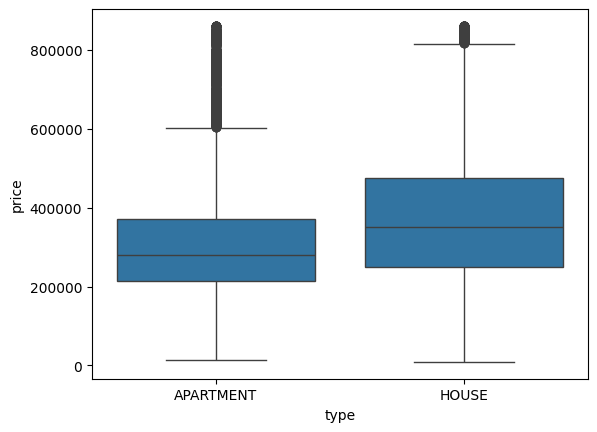

In [9]:
sns.boxplot(data=df, x='type', y='price')
plt.show()

In [10]:
def add_region_column(df) :
        province_to_region = {'Antwerp': 'Flanders', 
                              'East Flanders': 'Flanders',
                              'Flemish Brabant': 'Flanders', 
                              'Limburg': 'Flanders',
                              'West Flanders': 'Flanders',
                              'Walloon Brabant': 'Wallonia',
                              'Hainaut': 'Wallonia',
                              'Liège': 'Wallonia',
                              'Luxembourg': 'Wallonia',
                              'Namur': 'Wallonia',
                              'Brussels': 'Brussels'}
        df['region'] = df['province'].map(province_to_region)
        return df

add_region_column(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62272 entries, 0 to 80367
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               62272 non-null  object 
 1   subtype            62272 non-null  object 
 2   bedroomcount       60443 non-null  float64
 3   province           62272 non-null  object 
 4   locality           62272 non-null  object 
 5   postcode           62272 non-null  int64  
 6   habitablesurface   62272 non-null  float64
 7   buildingcondition  47842 non-null  object 
 8   haslift            16135 non-null  object 
 9   hasgarden          13340 non-null  object 
 10  hasswimmingpool    909 non-null    object 
 11  hasterrace         40074 non-null  object 
 12  epcscore           53168 non-null  object 
 13  price              62272 non-null  float64
 14  region             62272 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 7.6+ MB


In [11]:
df[['hasswimmingpool', 'haslift', 'hasgarden', 'hasterrace']] = df[['hasswimmingpool', 'haslift', 'hasgarden', 'hasterrace']].fillna(False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62272 entries, 0 to 80367
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               62272 non-null  object 
 1   subtype            62272 non-null  object 
 2   bedroomcount       60443 non-null  float64
 3   province           62272 non-null  object 
 4   locality           62272 non-null  object 
 5   postcode           62272 non-null  int64  
 6   habitablesurface   62272 non-null  float64
 7   buildingcondition  47842 non-null  object 
 8   haslift            62272 non-null  bool   
 9   hasgarden          62272 non-null  bool   
 10  hasswimmingpool    62272 non-null  bool   
 11  hasterrace         62272 non-null  bool   
 12  epcscore           53168 non-null  object 
 13  price              62272 non-null  float64
 14  region             62272 non-null  object 
dtypes: bool(4), float64(3), int64(1), object(7)
memory usage: 5.9+ MB


In [12]:
df.dropna(subset=["epcscore"], inplace=True)
df = df[df['epcscore'].str.contains("_") == False]
df = df[df['epcscore'].str.contains("X") == False]

df['epcscore'].value_counts()

epcscore
B      10632
C       9869
D       8254
A       7085
F       7004
E       5403
G       3397
A+      1279
A++      230
Name: count, dtype: int64

In [13]:
df.dropna(subset=["buildingcondition", "bedroomcount"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41109 entries, 0 to 80367
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               41109 non-null  object 
 1   subtype            41109 non-null  object 
 2   bedroomcount       41109 non-null  float64
 3   province           41109 non-null  object 
 4   locality           41109 non-null  object 
 5   postcode           41109 non-null  int64  
 6   habitablesurface   41109 non-null  float64
 7   buildingcondition  41109 non-null  object 
 8   haslift            41109 non-null  bool   
 9   hasgarden          41109 non-null  bool   
 10  hasswimmingpool    41109 non-null  bool   
 11  hasterrace         41109 non-null  bool   
 12  epcscore           41109 non-null  object 
 13  price              41109 non-null  float64
 14  region             41109 non-null  object 
dtypes: bool(4), float64(3), int64(1), object(7)
memory usage: 3.9+ MB


In [14]:
df[['haslift','hasgarden','hasswimmingpool', 'hasterrace']] = df[['haslift','hasgarden','hasswimmingpool', 'hasterrace']].astype(int)

In [15]:
pc_stats = df.groupby('postcode')['postcode'].agg('count').sort_values(ascending=False)
pc_stats_less_than10 = pc_stats[pc_stats <= 10]
df.postcode = df.postcode.apply(lambda x: 'other' if x in pc_stats_less_than10 else x)
print(len(df.postcode.unique()))
df.postcode.value_counts()

674


postcode
other    1652
8400      740
9000      558
8300      546
4000      494
         ... 
4210       11
3900       11
8690       11
5080       11
3470       11
Name: count, Length: 674, dtype: int64

In [16]:
df = df[df.postcode != 'other']
df.postcode.value_counts()

postcode
8400    740
9000    558
8300    546
4000    494
1000    459
       ... 
7330     11
8690     11
5080     11
3900     11
3470     11
Name: count, Length: 673, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39457 entries, 0 to 80367
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               39457 non-null  object 
 1   subtype            39457 non-null  object 
 2   bedroomcount       39457 non-null  float64
 3   province           39457 non-null  object 
 4   locality           39457 non-null  object 
 5   postcode           39457 non-null  object 
 6   habitablesurface   39457 non-null  float64
 7   buildingcondition  39457 non-null  object 
 8   haslift            39457 non-null  int64  
 9   hasgarden          39457 non-null  int64  
 10  hasswimmingpool    39457 non-null  int64  
 11  hasterrace         39457 non-null  int64  
 12  epcscore           39457 non-null  object 
 13  price              39457 non-null  float64
 14  region             39457 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 4.8+ MB


In [18]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 80367
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               38701 non-null  object 
 1   subtype            38701 non-null  object 
 2   bedroomcount       38701 non-null  float64
 3   province           38701 non-null  object 
 4   locality           38701 non-null  object 
 5   postcode           38701 non-null  object 
 6   habitablesurface   38701 non-null  float64
 7   buildingcondition  38701 non-null  object 
 8   haslift            38701 non-null  int64  
 9   hasgarden          38701 non-null  int64  
 10  hasswimmingpool    38701 non-null  int64  
 11  hasterrace         38701 non-null  int64  
 12  epcscore           38701 non-null  object 
 13  price              38701 non-null  float64
 14  region             38701 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 4.7+ MB


In [19]:
"""from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#Encoding dummy variables

df_dummies = pd.get_dummies(df["epcscore"], drop_first=True)
print(df_dummies.head())
print(df_dummies.columns)
df = pd.concat([df, df_dummies], axis=1)
df = df.drop("epcscore", axis=1)

df.info()"""

"""X = df_dummies.drop("price", axis=1).values
y = df_dummies["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
scoring="neg_mean_squared_error")
print(np.sqrt(-linreg_cv))"""

'X = df_dummies.drop("price", axis=1).values\ny = df_dummies["price"].values\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\nrandom_state=42)\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nlinreg = LinearRegression()\nlinreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,\nscoring="neg_mean_squared_error")\nprint(np.sqrt(-linreg_cv))'

In [20]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']])
df['epcscore_encoded'] = oe.fit_transform(df[['epcscore']])

oe2 = OrdinalEncoder(categories=[['AS_NEW','JUST_RENOVATED','GOOD','TO_BE_DONE_UP','TO_RENOVATE','TO_RESTORE']])
df['buildingcondition_encoded'] = oe2.fit_transform(df[['buildingcondition']])

# oe3 = OrdinalEncoder(categories=[['APARTMENT','HOUSE']])
# df['type_encoded'] = oe3.fit_transform(df[['type']])
print(df.head())

        type      subtype  bedroomcount  province   locality postcode  \
0  APARTMENT    APARTMENT           2.0  Brussels  Etterbeek     1040   
2  APARTMENT    APARTMENT           2.0  Brussels  Etterbeek     1040   
3  APARTMENT    APARTMENT           2.0  Brussels  Bruxelles     1040   
4  APARTMENT  FLAT_STUDIO           1.0  Brussels  Etterbeek     1040   
5  APARTMENT    APARTMENT           2.0  Brussels  ETTERBEEK     1040   

   habitablesurface buildingcondition  haslift  hasgarden  hasswimmingpool  \
0             100.0              GOOD        1          0                0   
2              87.0            AS_NEW        1          0                0   
3             104.0            AS_NEW        1          0                0   
4              71.0            AS_NEW        0          0                0   
5              90.0     TO_BE_DONE_UP        1          0                0   

   hasterrace epcscore     price    region  epcscore_encoded  \
0           1        C  3990

In [21]:
df.drop(columns='subtype', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 80367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type                       38701 non-null  object 
 1   bedroomcount               38701 non-null  float64
 2   province                   38701 non-null  object 
 3   locality                   38701 non-null  object 
 4   postcode                   38701 non-null  object 
 5   habitablesurface           38701 non-null  float64
 6   buildingcondition          38701 non-null  object 
 7   haslift                    38701 non-null  int64  
 8   hasgarden                  38701 non-null  int64  
 9   hasswimmingpool            38701 non-null  int64  
 10  hasterrace                 38701 non-null  int64  
 11  epcscore                   38701 non-null  object 
 12  price                      38701 non-null  float64
 13  region                     38701 non-null  object 


In [22]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding with Scikit-learn
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[['region']])

df_one_hot = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['region']), index=df.index)
df = pd.concat([df, df_one_hot], axis=1)
df.info()
df.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 80367
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type                       38701 non-null  object 
 1   bedroomcount               38701 non-null  float64
 2   province                   38701 non-null  object 
 3   locality                   38701 non-null  object 
 4   postcode                   38701 non-null  object 
 5   habitablesurface           38701 non-null  float64
 6   buildingcondition          38701 non-null  object 
 7   haslift                    38701 non-null  int64  
 8   hasgarden                  38701 non-null  int64  
 9   hasswimmingpool            38701 non-null  int64  
 10  hasterrace                 38701 non-null  int64  
 11  epcscore                   38701 non-null  object 
 12  price                      38701 non-null  float64
 13  region                     38701 non-null  object 


type       bedroomcount  province  locality               postcode  habitablesurface  buildingcondition  haslift  hasgarden  hasswimmingpool  hasterrace  epcscore  price     region    epcscore_encoded  buildingcondition_encoded  region_Brussels  region_Flanders  region_Wallonia
APARTMENT  2.0           Antwerp   ANTWERPEN              2000      130.0             GOOD               0        0          0                0           E         315000.0  Flanders  6.0               2.0                        0.0              1.0              0.0                3
HOUSE      3.0           Antwerp   RAMSEL                 2230      77.0              GOOD               0        0          0                1           F         165000.0  Flanders  7.0               2.0                        0.0              1.0              0.0                3
APARTMENT  3.0           Brussels  BERCHEM-SAINTE-AGATHE  1082      131.0             GOOD               0        0          0                1          

In [23]:
# df = df.dropna(subset=['type'])
df.dropna(inplace=True)
df['type_encoded'] = (df['type'] == 'HOUSE').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 80367
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type                       38701 non-null  object 
 1   bedroomcount               38701 non-null  float64
 2   province                   38701 non-null  object 
 3   locality                   38701 non-null  object 
 4   postcode                   38701 non-null  object 
 5   habitablesurface           38701 non-null  float64
 6   buildingcondition          38701 non-null  object 
 7   haslift                    38701 non-null  int64  
 8   hasgarden                  38701 non-null  int64  
 9   hasswimmingpool            38701 non-null  int64  
 10  hasterrace                 38701 non-null  int64  
 11  epcscore                   38701 non-null  object 
 12  price                      38701 non-null  float64
 13  region                     38701 non-null  object 


In [24]:
# df.drop(columns=['type','province','locality','buildingcondition','epcscore','region'], inplace=True)
df.info()
df.reset_index(drop=True, inplace=True)
df.to_csv('data_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 80367
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type                       38701 non-null  object 
 1   bedroomcount               38701 non-null  float64
 2   province                   38701 non-null  object 
 3   locality                   38701 non-null  object 
 4   postcode                   38701 non-null  object 
 5   habitablesurface           38701 non-null  float64
 6   buildingcondition          38701 non-null  object 
 7   haslift                    38701 non-null  int64  
 8   hasgarden                  38701 non-null  int64  
 9   hasswimmingpool            38701 non-null  int64  
 10  hasterrace                 38701 non-null  int64  
 11  epcscore                   38701 non-null  object 
 12  price                      38701 non-null  float64
 13  region                     38701 non-null  object 
